<div >
<img src = "../banner.jpg" />
</div>

<a href="https://colab.research.google.com/github/ignaciomsarmiento/BDML_202401/blob/main/Modulo08/01_Modulo08_Example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro a Deep Learning

## Llamando las librerías

In [ ]:
# install.packages("pacman") #run this line if you use Google Colab

In [1]:
require("pacman")

p_load("tidyverse","keras","modeldata")

data("ames", package = "modeldata")

head(ames)

Loading required package: pacman



MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,⋯,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>,<dbl>,<dbl>
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,⋯,No_Fence,None,0,5,2010,WD,Normal,215000,-93.61975,42.05403
One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,⋯,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.61976,42.05301
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,⋯,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.61939,42.05266
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,⋯,No_Fence,None,0,4,2010,WD,Normal,244000,-93.61732,42.05125
Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,⋯,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.63893,42.06090
Two_Story_1946_and_Newer,Residential_Low_Density,78,9978,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,⋯,No_Fence,None,0,6,2010,WD,Normal,195500,-93.63893,42.06078


### ¿Qué es Keras?

Keras es una biblioteca de aprendizaje profundo de código abierto escrita en Python. Keras proporciona una interfaz de alto nivel para construir y entrenar modelos de aprendizaje profundo en una variedad de plataformas. La biblioteca Keras es conocida por ser fácil de usar, modular y extensible. Permite a los usuarios crear modelos de aprendizaje profundo con pocas líneas de código y está diseñada para ser utilizada en combinación con otras bibliotecas populares de Python, como TensorFlow.

Keras ofrece una amplia gama de  funciones de pérdida, optimizadores y métricas de evaluación que se pueden utilizar para entrenar y evaluar modelos.

En el caso específico de R, la instalación de Keras puede ser  complicada si no se tienen todas las dependencias y configuraciones necesarias en su lugar. Por ejemplo, es necesario tener TensorFlow instalado correctamente antes de poder instalar y utilizar Keras en R. También puede ser necesario instalar otras dependencias adicionales, como el paquete reticulate, que se utiliza para conectar `R` con `Python. Para saber más de cómo instalar keras localmente pueden ir [acá](https://tensorflow.rstudio.com/install/). Por ello mi recomendación es utilizar google Colab.

## Entrenando una red muy simple


In [2]:
y<-log(ames$Sale_Price) 
X<- as.matrix(ames  %>% select(Full_Bath,Lot_Area))
X<- scale(X)
head(X)

Full_Bath,Lot_Area
-1.0246180,2.74391236
-1.0246180,0.18706533
-1.0246180,0.52272448
0.7838945,0.12843602
0.7838945,0.46726775
0.7838945,-0.02156364


In [3]:
head(y)

[1] 12.27839 11.56172 12.05525 12.40492 12.15425 12.18332

<div >
 <img src = "figures/networkexample.png" />
</div>

In [4]:

snn <- keras_model_sequential() %>%
  layer_dense(units = 2, activation = "sigmoid",
              input_shape = ncol(X)) %>%
  layer_dense(units = 1)


In [5]:
summary(snn)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_1 (Dense)                     (None, 2)                       6           
________________________________________________________________________________
dense (Dense)                       (None, 1)                       3           
Total params: 9
Trainable params: 9
Non-trainable params: 0
________________________________________________________________________________


In [8]:
snn %>% compile(loss = "mse",
                  optimizer = 'adam',
                  metrics = list("mean_squared_error") # mean_absolute_error
)


set.seed(10101)
history <- snn %>% fit(
  X, y, 
  epochs = 30, 
  validation_split = 0.3
)



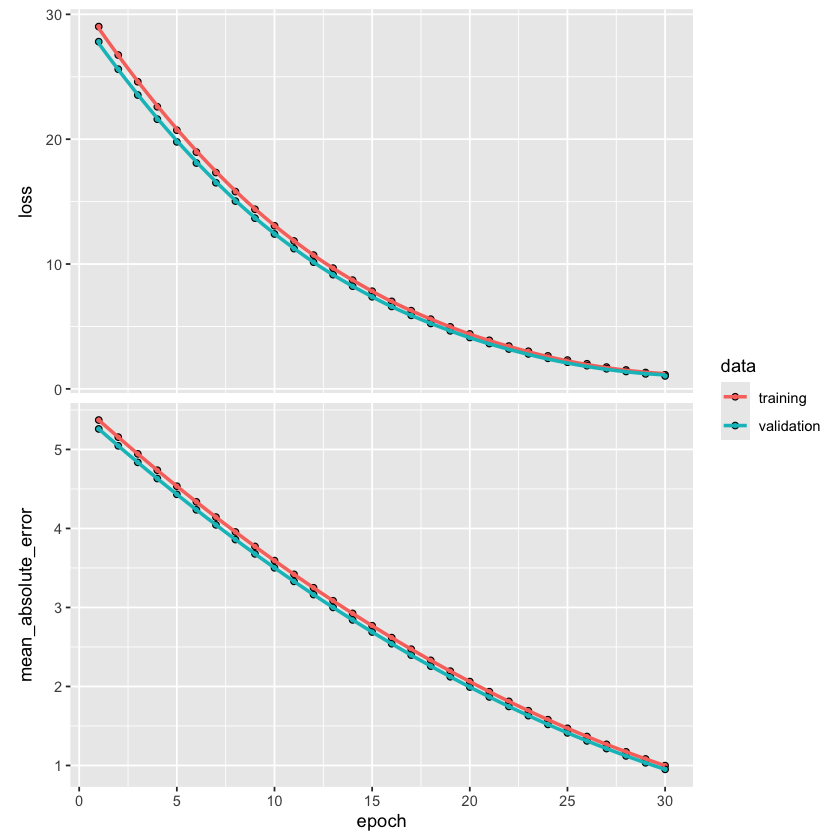

In [9]:
plot(history)